In [1157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [1159]:
# Prepare the URLs to be read
sheet_url_lower = "https://docs.google.com/spreadsheets/d/1PH-Y_dWjw5gqW-ZKwXCbSgaASJtL0NLCS5pAFHDfcaQ/edit#gid=1953380611"
csv_export_url_lower = sheet_url_lower.replace('/edit#gid=', '/export?format=csv&gid=')

sheet_url_upper = "https://docs.google.com/spreadsheets/d/1PH-Y_dWjw5gqW-ZKwXCbSgaASJtL0NLCS5pAFHDfcaQ/edit#gid=567432161"
csv_export_url_upper = sheet_url_upper.replace('/edit#gid=', '/export?format=csv&gid=')

In [1163]:
# Read the URLs and fill null values with 0
df_lower = pd.read_csv(csv_export_url_lower)
df_lower = df_lower.fillna("0")

df_upper = pd.read_csv(csv_export_url_upper)
df_upper = df_upper.fillna("0")

df_upper.head()

,Upper/Lower,ME/DE/SUP,Primary Muscle,Exercise,06/08/2021,10/08/2021,13/08/2021,17/08/2021,20/08/2021,24/08/2021,27/08/2021,31/08/2021,03/09/2021
0,Upper,ME,Chest,Bench Press - Med,2x65x2,0,0,0,0,0,0,0,0
1,Upper,ME,Chest,Incline Bench - Med,0,0,2x65x2,0,0,0,0,0,0
2,Upper,ME,Triceps,Close Grip Bench Press,0,0,0,0,0,0,0,0,0
3,Upper,ME,Triceps,Close Grip Rack Press,0,0,0,0,0,0,0,0,0
4,Upper,ME,Chest,Bnech Press - Med - Rack,0,0,0,0,0,0,0,0,0


In [1165]:
# Get the list of column names 
lower_dates = df_lower.columns.tolist()
upper_dates = df_upper.columns.tolist()

# Remove the non-Date columns
columns_to_remove = ["Upper/Lower", "ME/DE/SUP", "Primary Muscle", "Exercise"]

for column in columns_to_remove:
    lower_dates.remove(column)
    upper_dates.remove(column)

upper_dates

['06/08/2021',
 '10/08/2021',
 '13/08/2021',
 '17/08/2021',
 '20/08/2021',
 '24/08/2021',
 '27/08/2021',
 '31/08/2021',
 '03/09/2021']

In [1167]:
# data is entered as sets x weight lifted x number of reps eg. 3x50x10 
# replace x with * and evaluate to calculate volume lifted

volume_lower_dict = {}

for date in lower_dates:
    day_list = []

    for index, row in df_lower.iterrows():
        day_list.append(eval(row[str(date)].replace("x", "*")))

    volume_lower_dict[str(date)] = day_list
    
volume_lower_df = pd.DataFrame(data = volume_lower_dict, columns = volume_lower_dict.keys())

In [1171]:
volume_upper_dict = {}

for date in upper_dates:
    day_list = []

    for index, row in df_upper.iterrows():
        day_list.append(eval(row[str(date)].replace("x", "*")))

    volume_upper_dict[str(date)] = day_list
    
volume_upper_df = pd.DataFrame(data = volume_upper_dict, columns = volume_upper_dict.keys())

In [1173]:
# Add the non-Date columns back
volume_lower_df["Exercise"], volume_lower_df["Upper/Lower"], volume_lower_df["ME/DE/SUP"], volume_lower_df["Primary Muscle"] = [df_lower["Exercise"], df_lower["Upper/Lower"], df_lower["ME/DE/SUP"], df_lower["Primary Muscle"]]
volume_lower_df.head()


,02/08/21,05/08/21,09/08/21,12/8/21,16/08/21,19/8/21,23/08/21,26/8/21,30/08/21,2/9/21,6/9/21,9/9/21,Exercise,Upper/Lower,ME/DE/SUP,Primary Muscle
0,0,1440,280,1620,0,1800,0,0,0,0,0,0,Box Squat - Regular,Lower,ME,Quads
1,0,0,0,0,0,0,0,0,0,0,0,0,Box Squat - Narrow,Lower,ME,Quads
2,0,0,0,0,0,0,0,0,0,0,0,0,Box Squat - Wide,Lower,ME,Quads
3,0,0,0,0,0,0,0,0,0,0,0,0,Deadlift,Lower,ME,Hamstrings
4,0,0,0,0,0,1620,0,0,0,0,0,0,Sumo Deadlift,Lower,ME,Hamstrings


In [1175]:
volume_upper_df["Exercise"], volume_upper_df["Upper/Lower"], volume_upper_df["ME/DE/SUP"], volume_upper_df["Primary Muscle"] = [df_upper["Exercise"], df_upper["Upper/Lower"], df_upper["ME/DE/SUP"], df_upper["Primary Muscle"]]
volume_upper_df.head()

,06/08/2021,10/08/2021,13/08/2021,17/08/2021,20/08/2021,24/08/2021,27/08/2021,31/08/2021,03/09/2021,Exercise,Upper/Lower,ME/DE/SUP,Primary Muscle
0,260.0,0.0,0.0,0,0,0,0,0,0,Bench Press - Med,Upper,ME,Chest
1,0.0,0.0,260.0,0,0,0,0,0,0,Incline Bench - Med,Upper,ME,Chest
2,0.0,0.0,0.0,0,0,0,0,0,0,Close Grip Bench Press,Upper,ME,Triceps
3,0.0,0.0,0.0,0,0,0,0,0,0,Close Grip Rack Press,Upper,ME,Triceps
4,0.0,0.0,0.0,0,0,0,0,0,0,Bnech Press - Med - Rack,Upper,ME,Chest


In [1177]:
# Pivot / sum the volumes based on primary muscle 
volume_lower_df_pivot = pd.pivot_table(volume_lower_df,
                                 values = lower_dates,
                                 index = ["Upper/Lower", "Primary Muscle"],
                                 aggfunc = np.sum)

volume_upper_df_pivot = pd.pivot_table(volume_upper_df,
                                 values = upper_dates,
                                 index = ["Upper/Lower", "Primary Muscle"],
                                 aggfunc = np.sum)

In [1183]:
# Transpose the dataframe
volume_lower_df_pivot = volume_lower_df_pivot.T
volume_upper_df_pivot = volume_upper_df_pivot.T
volume_upper_df_pivot

Upper/Lower    Upper                                           
Primary Muscle  Back Biceps   Chest Rear Delt Shoulders Triceps
03/09/2021       0.0    0.0  3200.0       0.0       0.0     0.0
06/08/2021       0.0    0.0   287.0     202.5     202.5   750.0
10/08/2021       0.0    0.0  1650.0       0.0       0.0  1417.5
13/08/2021       0.0    0.0   299.0     162.0     270.0   660.0
17/08/2021       0.0    0.0  1842.0       0.0       0.0  1560.0
20/08/2021       0.0    0.0   163.0       0.0       0.0  1740.0
24/08/2021       0.0    0.0  2025.0       0.0       0.0  1200.0
27/08/2021       0.0    0.0   149.0       0.0       0.0  1920.0
31/08/2021       0.0    0.0   960.0       0.0       0.0  1000.0

In [1187]:
# Calculate volume lifted for groups of muscles
volume_lower_df_pivot["Total_Leg"] = volume_lower_df_pivot["Lower"]["Quads"] + volume_lower_df_pivot["Lower"]["Hamstrings"] + volume_lower_df_pivot["Lower"]["Glutes"]
volume_upper_df_pivot["Total_Chest/Tri"] = volume_upper_df_pivot["Upper"]["Chest"] + volume_upper_df_pivot["Upper"]["Triceps"]

In [1189]:
volume_upper_df_pivot

Upper/Lower    Upper                                             \
Primary Muscle  Back Biceps   Chest Rear Delt Shoulders Triceps   
03/09/2021       0.0    0.0  3200.0       0.0       0.0     0.0   
06/08/2021       0.0    0.0   287.0     202.5     202.5   750.0   
10/08/2021       0.0    0.0  1650.0       0.0       0.0  1417.5   
13/08/2021       0.0    0.0   299.0     162.0     270.0   660.0   
17/08/2021       0.0    0.0  1842.0       0.0       0.0  1560.0   
20/08/2021       0.0    0.0   163.0       0.0       0.0  1740.0   
24/08/2021       0.0    0.0  2025.0       0.0       0.0  1200.0   
27/08/2021       0.0    0.0   149.0       0.0       0.0  1920.0   
31/08/2021       0.0    0.0   960.0       0.0       0.0  1000.0   

Upper/Lower    Total_Chest/Tri  
Primary Muscle                  
03/09/2021              3200.0  
06/08/2021              1037.0  
10/08/2021              3067.5  
13/08/2021               959.0  
17/08/2021              3402.0  
20/08/2021              1903.0  
24/08/2021              3225.0  
27/08/2021              2069.0  
31/08/2021              1960.0

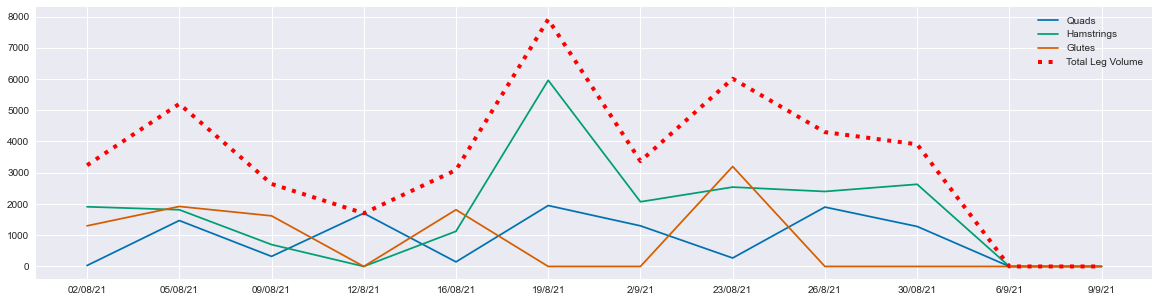

In [1195]:
plt.figure(figsize= (20, 5))
plt.plot(volume_lower_df_pivot["Lower"][["Quads", "Hamstrings", "Glutes"]], label = ["Quads", "Hamstrings", "Glutes"])
plt.plot(volume_lower_df_pivot["Total_Leg"], label = "Total Leg Volume", linewidth=4,  linestyle=':', color='red')
plt.legend()

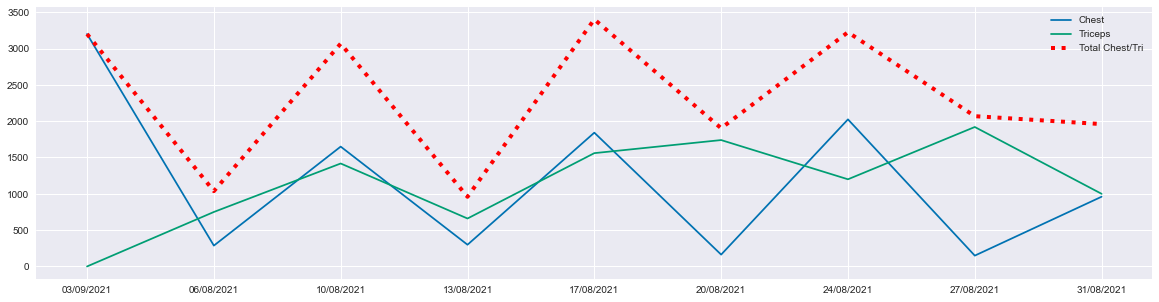

In [1197]:
plt.figure(figsize= (20, 5))
plt.plot(volume_upper_df_pivot["Upper"][["Chest", "Triceps"]], label = ["Chest", "Triceps"])
plt.plot(volume_upper_df_pivot["Total_Chest/Tri"], label = "Total Chest/Tri", linewidth=4,  linestyle=':', color='red')
plt.legend()

In [ ]:
# add perceieved 1RM based on !RM calc vs actual, compared to weekly volume